### World Happiness dataset

We are going to investigate the world happiness, GDP and train several models in order to predict this indicator

In [1]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

**Loading Data**

In [2]:
df1=pd.read_csv('/home/mohammadreza/Kaggle/GDP/world-happiness-report-2021.csv')
df=pd.read_csv('/home/mohammadreza/Kaggle/GDP/world-happiness-report.csv')
df1.head(10)
df.head(10)


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


**Getting some usefull information about `world happiness report` from 2005 till 2020.**

In [3]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [4]:
df.shape

(1949, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [6]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [7]:
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

Seems we have some `NAN` or `NA` data. It is required to do something. Before that, let us visualize our data by plotting `histogram` and other methods

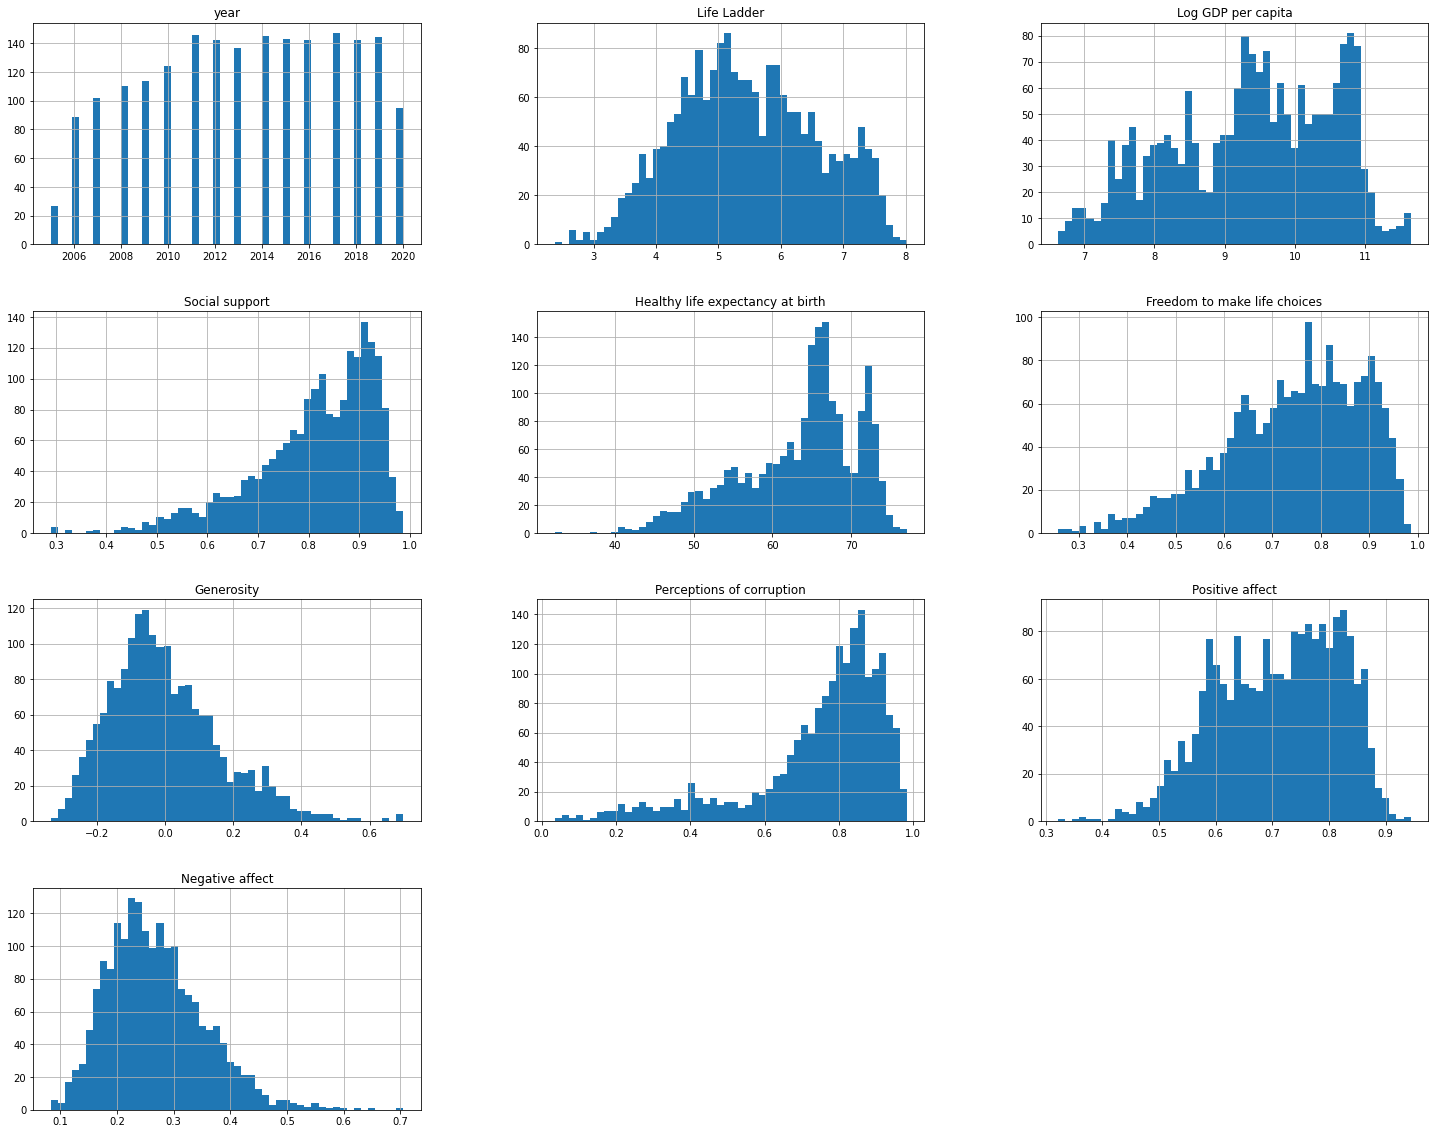

In [8]:
df.hist(bins=50, figsize=(25,20))
plt.show()

First, I want to analyze _Iran_ for example.

In [10]:
Iran=df[df['Country name']=='Iran']
Iran

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
761,Iran,2005,5.308,9.393,0.766,62.00,0.651,NaN,0.636,0.608,0.456
762,Iran,2007,5.336,9.497,0.718,62.76,0.533,0.056,0.872,0.626,0.361
763,Iran,2008,5.129,9.489,0.633,63.14,0.601,0.052,0.868,0.624,0.345
764,Iran,2011,4.768,9.547,0.582,64.14,0.798,0.200,0.665,0.578,0.359
765,Iran,2012,4.609,9.458,0.600,64.38,0.764,NaN,0.678,0.609,0.525
766,Iran,2013,5.140,9.443,0.664,64.62,0.730,0.216,0.685,0.659,0.552
767,Iran,2014,4.682,9.476,0.644,64.86,0.767,0.241,0.640,0.618,0.512
768,Iran,2015,4.750,9.449,0.572,65.10,0.780,0.176,0.699,0.645,0.520
769,Iran,2016,4.653,9.561,0.566,65.40,0.773,0.186,0.713,0.687,0.526
770,Iran,2017,4.717,9.584,0.714,65.70,0.731,0.218,0.715,0.694,0.439


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2005.0,5.308,9.3930,0.766,62.00,0.651,0.168125,0.636,0.608,0.456
1,2007.0,5.336,9.4970,0.718,62.76,0.533,0.056000,0.872,0.626,0.361
2,2008.0,5.129,9.4890,0.633,63.14,0.601,0.052000,0.868,0.624,0.345
3,2011.0,4.768,9.5470,0.582,64.14,0.798,0.200000,0.665,0.578,0.359
4,2012.0,4.609,9.4580,0.600,64.38,0.764,0.168125,0.678,0.609,0.525
5,2013.0,5.140,9.4430,0.664,64.62,0.730,0.216000,0.685,0.659,0.552
6,2014.0,4.682,9.4760,0.644,64.86,0.767,0.241000,0.640,0.618,0.512
7,2015.0,4.750,9.4490,0.572,65.10,0.780,0.176000,0.699,0.645,0.520
8,2016.0,4.653,9.5610,0.566,65.40,0.773,0.186000,0.713,0.687,0.526
9,2017.0,4.717,9.5840,0.714,65.70,0.731,0.218000,0.715,0.694,0.439


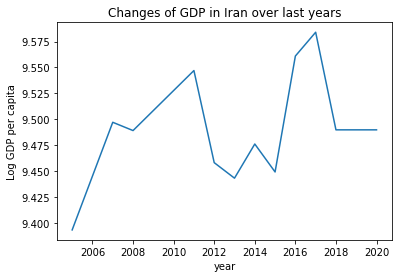

In [12]:
#plt.figure(figsize=(15,5))
imputer=SimpleImputer(strategy='mean')
Iran_num=Iran.drop(['Country name'], axis=1, inplace=False)
Iran_tr=pd.DataFrame(imputer.fit_transform(Iran_num), columns=Iran_num.columns)
sns.lineplot(data=Iran_tr, x='year', y='Log GDP per capita')
plt.title('Changes of GDP in Iran over last years')
Iran_tr
#sns.lineplot(data=Iran, x='year', y='Life Ladder')

Text(0.5, 1.0, 'Changes of life ladder (a parameter denotes life implement) in Iran over last years')

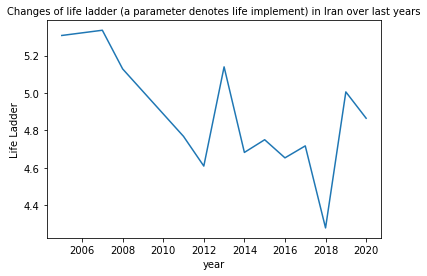

In [18]:
sns.lineplot(data=Iran_tr, x='year', y='Life Ladder')
plt.title('Changes of life ladder (a parameter denotes life implement) in Iran over last years', fontsize=10)

Text(0.5, 1.0, 'Changes of social support in Iran over last years')

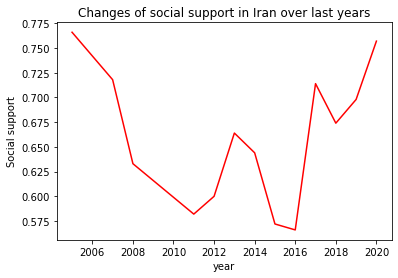

In [20]:
sns.lineplot(data=Iran_tr, x='year', y='Social support', color='red')
plt.title('Changes of social support in Iran over last years', fontsize=12)

Text(0.5, 1.0, 'Perceptions of corruption in Iran over last years')

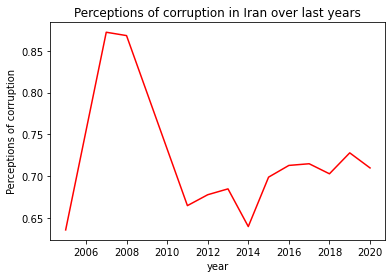

In [22]:
sns.lineplot(data=Iran_tr, x='year', y='Perceptions of corruption', color='red')
plt.title('Perceptions of corruption in Iran over last years', fontsize=12)

Now for all data we calculate the `Correlation` between features to detect the most importants

In [24]:
corr_mx=df.corr()
corr_mx['Log GDP per capita'].sort_values(ascending=False)

Log GDP per capita                  1.000000
Healthy life expectancy at birth    0.848049
Life Ladder                         0.790166
Social support                      0.692602
Freedom to make life choices        0.367932
Positive affect                     0.302282
year                                0.078246
Generosity                         -0.000915
Negative affect                    -0.210781
Perceptions of corruption          -0.345511
Name: Log GDP per capita, dtype: float64

It can be seen also in `heatmap`

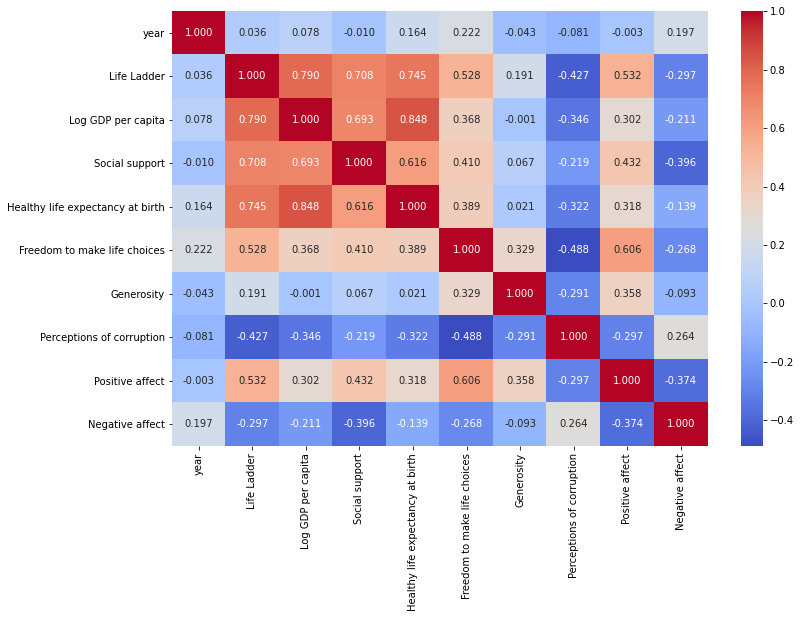

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_mx, annot=True, fmt='.3f', cmap='coolwarm')
plt.show()

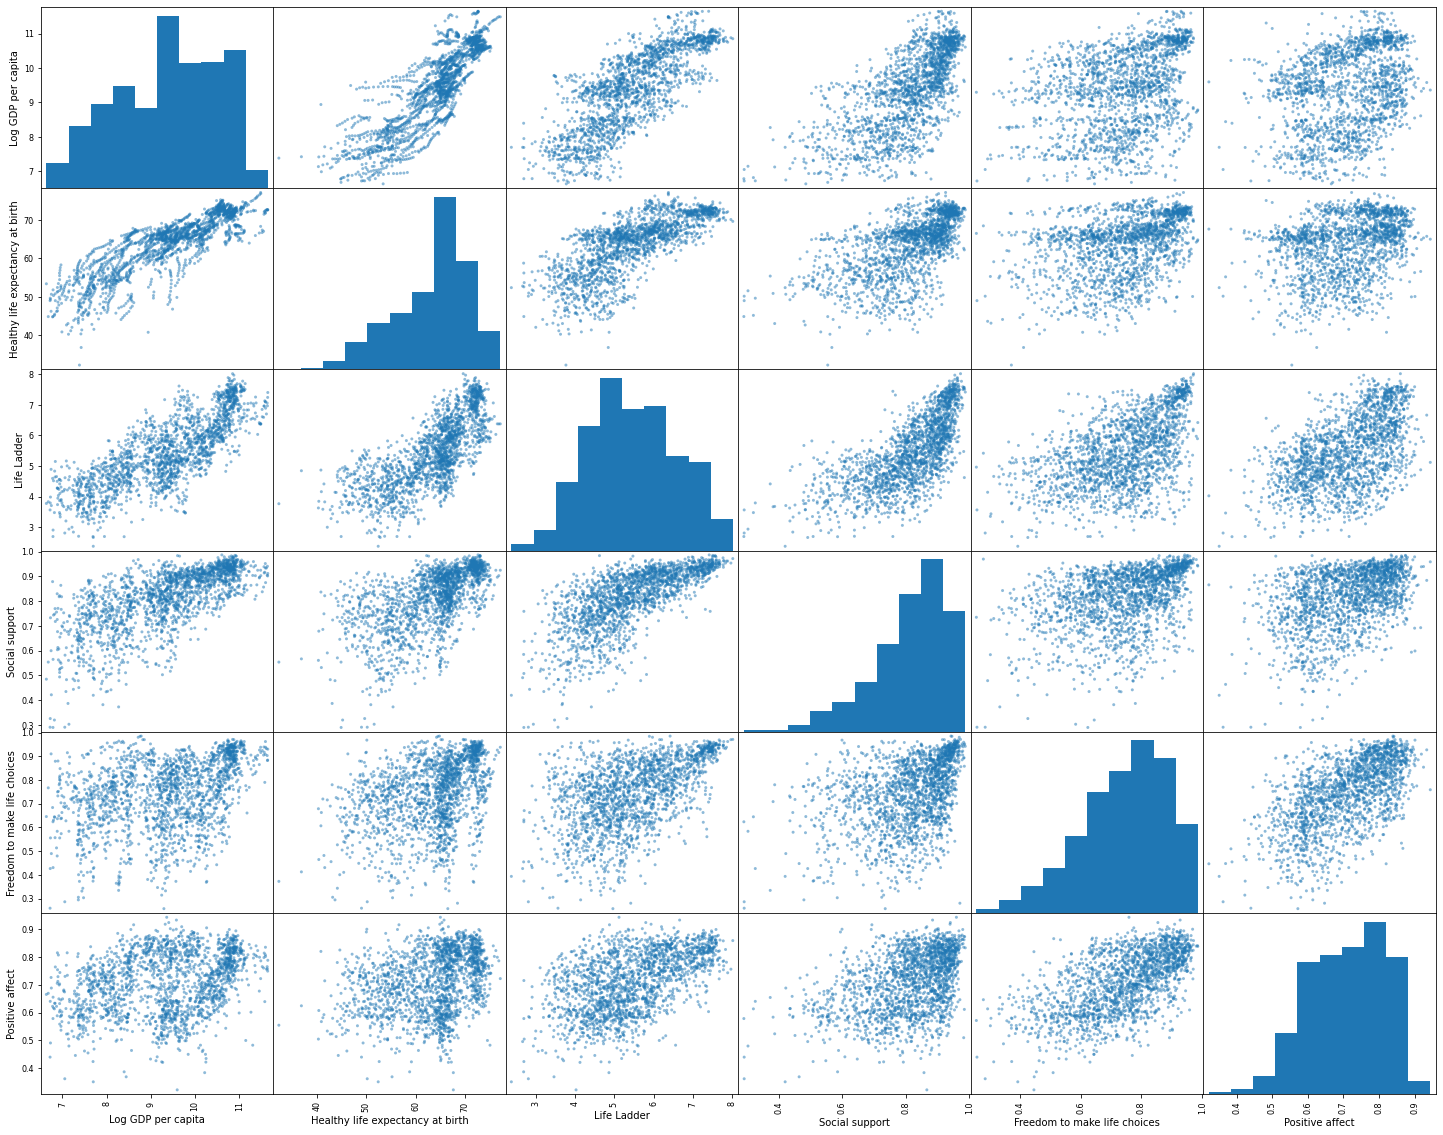

In [13]:
from pandas.plotting import scatter_matrix
attributes=['Log GDP per capita','Healthy life expectancy at birth', 'Life Ladder', 'Social support','Freedom to make life choices',
           'Positive affect']

scatter_matrix(df[attributes], figsize=(25,20))
plt.show()

In [14]:
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


The very first step is to split `train_set` and `test_set`. For this purpose we have:

In [15]:
train_set, test_set=train_test_split(df, test_size=0.2, random_state=42)
train_set

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
862,Jordan,2008,4.930,9.343,0.766,64.220,NaN,-0.127,0.709,0.669,0.331
534,Estonia,2013,5.367,10.299,0.901,67.480,0.754,-0.201,0.726,0.702,0.199
1649,Sweden,2018,7.375,10.881,0.931,72.600,0.942,0.077,0.263,0.823,0.161
1682,Tajikistan,2006,4.613,7.554,0.724,60.640,0.702,-0.088,0.768,0.566,0.195
925,Kuwait,2014,6.180,10.945,NaN,65.800,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1130,Moldova,2013,5.756,9.192,0.803,62.260,0.658,-0.069,0.941,0.582,0.261
1294,North Macedonia,2015,4.976,9.613,0.766,65.145,0.660,-0.047,0.824,0.620,0.299
860,Jordan,2005,6.295,9.246,0.920,63.500,NaN,NaN,0.670,0.696,0.240
1459,Rwanda,2012,3.333,7.428,0.637,57.440,0.835,-0.012,0.081,0.703,0.132


As I mentioned, there are some `NAN` and `NA` which have to be fixed. so:

In [16]:
train_set.isnull().sum()

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                  26
Social support                      10
Healthy life expectancy at birth    37
Freedom to make life choices        22
Generosity                          71
Perceptions of corruption           86
Positive affect                     17
Negative affect                     14
dtype: int64

Predictores and label data have to be choosen

In [17]:
# cleaning data, separating label and features
train_set2=train_set.dropna(subset=['Log GDP per capita'], inplace=False)
train_feature=train_set2.drop(['Log GDP per capita'], axis=1, inplace=False)
train_label=train_set2['Log GDP per capita'].copy()

I employ `mean()` strategy for `NAN` data and for preparing data we have :

In [18]:
from sklearn.pipeline import Pipeline

train_feature_num=train_feature.drop(['Country name'], axis=1, inplace=False)

num_pipe=Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler()),
])

num_attribs=list(train_feature_num)
cat_attribs=['Country name']

full_pipe=ColumnTransformer([
    ('num',num_pipe, num_attribs),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribs),
])

features_prepared=full_pipe.fit_transform(train_feature)
features_prepared

<1533x169 sparse matrix of type '<class 'numpy.float64'>'
	with 15245 stored elements in Compressed Sparse Row format>

In [19]:
type(features_prepared)

scipy.sparse.csr.csr_matrix

### _Traing Models_  

- LinearRegression

In [20]:
# Model Training
lin_reg=LinearRegression()
lin_reg.fit(features_prepared, train_label)

LinearRegression()

In [21]:
def cost_score(scores):
    print('Score"', scores)
    print('Mean:', scores.mean())
    print('Std:', scores.std())


lin_score=cross_val_score(lin_reg, features_prepared, train_label,
                         cv=10,
                         scoring='neg_mean_squared_error')
lin_rmse=np.sqrt(-lin_score)


cost_score(lin_rmse)

Score" [0.08827543 0.20127283 0.09558407 0.10036818 0.09061698 0.09087519
 0.09552407 0.12151541 0.08670248 0.09403363]
Mean: 0.10647682638301517
Std: 0.03295522072073758


- Ridge Regression

In [22]:
ridge_reg=Ridge() # Alpha=1 as default
ridge_reg.fit(features_prepared, train_label)

Ridge()

In [23]:
ridge_score=cross_val_score(ridge_reg, features_prepared,train_label,
                            cv=10, scoring='neg_mean_squared_error')
ridge_rmse=np.sqrt(-ridge_score)

cost_score(ridge_rmse)

Score" [0.15144394 0.16811691 0.16934549 0.17686777 0.20398701 0.17110747
 0.16456456 0.18816262 0.20182776 0.15401089]
Mean: 0.17494344006271187
Std: 0.01713335344215012


Tunning hyperparameter `alpha`

In [24]:
param_grid=[{
    'alpha':np.logspace(-5,5,10)
}]

grid_search_ridge=GridSearchCV(ridge_reg, param_grid, cv=10,
                        scoring="neg_mean_squared_error",
                        return_train_score=True)
grid_search_ridge.fit(features_prepared,train_label)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid=[{'alpha': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05])}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [25]:
grid_search_ridge.best_params_

{'alpha': 0.0001291549665014884}

In [26]:
cvres = grid_search_ridge.cv_results_
for mean_scores, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_scores), params)

0.12136175685228931 {'alpha': 1e-05}
0.1202083443948847 {'alpha': 0.0001291549665014884}
0.12254987400754219 {'alpha': 0.0016681005372000592}
0.12967366478278286 {'alpha': 0.021544346900318846}
0.1604561077450097 {'alpha': 0.2782559402207126}
0.2411944835279405 {'alpha': 3.593813663804626}
0.4587954226676649 {'alpha': 46.41588833612782}
0.5556223515688682 {'alpha': 599.4842503189421}
0.8912683417478724 {'alpha': 7742.636826811277}
1.1278760317603456 {'alpha': 100000.0}


In [27]:
ridge_model=grid_search_ridge.best_estimator_
ridge_model.fit(features_prepared,train_label)

ridge_model_score=cross_val_score(ridge_model,features_prepared,train_label,
                                 cv=10, scoring='neg_mean_squared_error')
ridge_model_rmse=np.sqrt(-ridge_model_score)

cost_score(ridge_model_rmse)

Score" [0.09656153 0.19612677 0.11742624 0.12083612 0.11081273 0.09028851
 0.09593653 0.122875   0.11681442 0.09970539]
Mean: 0.1167383236104004
Std: 0.028674202042822998


- LASSO regression

In [28]:
lasso_reg=Lasso() 

param_grid=[{
    'alpha': np.logspace(-5,5,10)
}]

grid_search_lasso=GridSearchCV(lasso_reg, param_grid, cv=10,
                              scoring='neg_mean_squared_error', return_train_score=True)

grid_search_lasso.fit(features_prepared,train_label)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid=[{'alpha': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05])}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [29]:
grid_search_lasso.best_params_

{'alpha': 1e-05}

In [30]:
cvres=grid_search_lasso.cv_results_
for mean_scores, params in zip(cvres['mean_test_score'], cvres['params']):
    print(-mean_scores,params)

0.012391627712683284 {'alpha': 1e-05}
0.01969003555298838 {'alpha': 0.0001291549665014884}
0.08813882940578446 {'alpha': 0.0016681005372000592}
0.2783381685266525 {'alpha': 0.021544346900318846}
0.3915513325650263 {'alpha': 0.2782559402207126}
1.3483895448753753 {'alpha': 3.593813663804626}
1.3483895448753753 {'alpha': 46.41588833612782}
1.3483895448753753 {'alpha': 599.4842503189421}
1.3483895448753753 {'alpha': 7742.636826811277}
1.3483895448753753 {'alpha': 100000.0}


In [31]:
lasso_model=grid_search_lasso.best_estimator_
lasso_model.fit(features_prepared,train_label)

lasso_model_score=cross_val_score(lasso_model, features_prepared, train_label,
                                 cv=10, scoring='neg_mean_squared_error')
lasso_model_rmse=np.sqrt(-lasso_model_score)

cost_score(lasso_model_rmse)

Score" [0.08761637 0.19737246 0.09582879 0.1005873  0.09475597 0.09176472
 0.09665817 0.120219   0.08628428 0.09665897]
Mean: 0.10677460232538247
Std: 0.03147716650112766


Looks it can be used as the final model. I know there are lots of another models, but that is enough because `lasso_model` seems good due to low `cost_function`

In [54]:
test_set.isnull().sum()

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                  10
Social support                       3
Healthy life expectancy at birth    18
Freedom to make life choices        10
Generosity                          18
Perceptions of corruption           24
Positive affect                      5
Negative affect                      2
dtype: int64

In [60]:
test_set1=test_set.dropna(subset=['Log GDP per capita'], inplace=False)

In [61]:
X_test=test_set1.drop(['Log GDP per capita'], axis=1, inplace=False)
y_test=test_set1['Log GDP per capita'].copy()

In [62]:
X_test

,Country name,year,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1614,Spain,2020,6.502,0.935,75.00,0.783,-0.121,0.730,0.686,0.317
1405,Poland,2017,6.201,0.882,68.90,0.831,-0.122,0.639,0.677,0.203
974,Lebanon,2012,4.573,0.713,65.36,0.621,-0.006,0.856,0.499,0.339
1055,Malaysia,2011,5.786,0.770,65.76,0.840,-0.016,0.842,0.887,0.155
307,Canada,2020,7.025,0.931,74.00,0.887,0.050,0.434,0.796,0.307
...,...,...,...,...,...,...,...,...,...,...
618,Germany,2018,7.118,0.920,72.20,0.877,0.034,0.496,0.780,0.243
426,Cyprus,2010,6.387,0.822,72.40,0.755,0.073,0.833,0.786,0.296
966,Latvia,2019,5.970,0.936,67.10,0.698,-0.194,0.789,0.575,0.212
849,Japan,2010,6.057,0.902,73.80,0.772,-0.140,0.770,0.827,0.188


In [63]:
y_test.isnull().sum()

0

In [34]:
print(X_test.iloc[0], y_test.iloc[0])

Country name                        Spain
year                                 2020
Life Ladder                         6.502
Social support                      0.935
Healthy life expectancy at birth     75.0
Freedom to make life choices        0.783
Generosity                         -0.121
Perceptions of corruption            0.73
Positive affect                     0.686
Negative affect                     0.317
Name: 1614, dtype: object 10.488


In [64]:
X_test_prepared=full_pipe.transform(X_test)

In [65]:
y0=ridge_model.predict(X_test_prepared)
final_mse=mean_squared_error(y0, y_test)
final_rmse=np.sqrt(final_mse)
final_rmse

0.10652664630004922